# Cvičenie 5 - Učenie s učiteľom a učenie bez učiteľa

- hlavný zdroj programátorskych informácií - [scikit learn](https://scikit-learn.org/stable/api/index.html)

## 1.Úlohy dnešného cvičenia pre učenie s učiteľom:

- Import, načítavanie dát, rozdelenie dát na tréningove/testovacie, škálovanie
- Trénovanie a evaluácia (Accuracy, Precision, Recall, F1):
  - Iris: Logistic Regression, Linear SVM, Decision Tree, Random Forest (+ decision boundary plots)
  - Breast Cancer: Logistic Regression, Linear SVM, RBF SVM, Decision Tree, Random Forest
- Experimenty s hyperparametrami (sledovanie precision/F1 zmien, došlo k preučeniu?)


## 1.1 Úloha - importy

- `numpy as np`, `matplotlib.pyplot as plt`
- datasets: `load_iris`, `load_breast_cancer`
- selection: `train_test_split`
- preprocessing: `StandardScaler`
- models: `LogisticRegression`, `SVC`, `LinearSVC`, `DecisionTreeClassifier`, `RandomForestClassifier`
- metrics: `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `classification_report`

In [32]:
# TODO
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
iris = load_iris()

from sklearn.decomposition import PCA

## 1.2. Úloha - Iris dataset

- Load Iris, select columns `[2, 3]` for X; use all labels `y`.
- Train/test split (`test_size=0.3`, `stratify=y`, `random_state=RANDOM_STATE`).
- Create standardized copies `X_train_s`, `X_test_s` (for linear models).

In [ ]:
X = iris.data[:, [2, 3]] 
y = iris.target      

RANDOM_STATE = 25

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

### Vykreslite trénovacie dáta ( pre jednoduchosť si zvoľte dva atribúty, ktoré vykreslíte)
- doplňte potrebné knižnice do import časti,nezabudnite, že dáta majú byť škálované

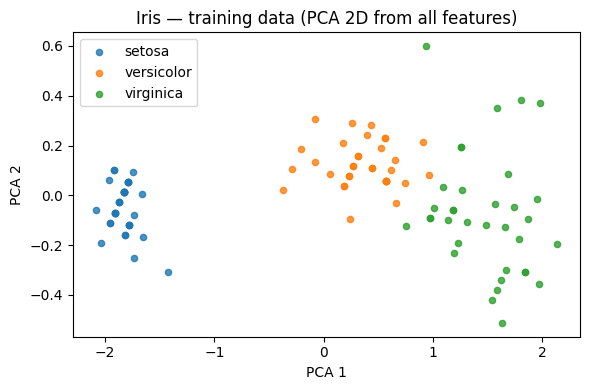

In [20]:
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_train_s)

class_names = ["setosa", "versicolor", "virginica"]

plt.figure(figsize=(6,4))
for cls, name in enumerate(class_names):
    sel = (y_train == cls)
    plt.scatter(X_pca[sel, 0], X_pca[sel, 1], s=20, alpha=0.8, label=name)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Iris — training data (PCA 2D from all features)")
plt.legend()
plt.tight_layout()
plt.show()

### [Logistická regresia](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- natrénujte, ohodnoťte
- sledujte ako zmena hyperparametrov mení výsledné hodnoty metrík

In [ ]:
# TODO
model = LogisticRegression(random_state=25, max_iter=200, C=1.0) 

model.fit(X_train_s, y_train)

y_pred = model.predict(X_test_s)

acc = accuracy_score(y_test, y_pred)
print("Точность (accuracy):", acc)

print("Подробный отчёт:\n", classification_report(y_test, y_pred, target_names=["setosa", "versicolor", "virginica"]))

Точность (accuracy): 0.9333333333333333
Подробный отчёт:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- natrénujte, ohodnoťte
- trénujte na **neškálovaných** dátach
- vyhodnoťte **macro** metriky a vizualizujte hranicu
- experiment: `max_depth ∈ {2, 3, 6}` (hľadajte **overfitting**)
- sledujte ako zmena hyperparametrov mení výsledné hodnoty metrík

In [22]:
# TODO

for depth in [2, 3, 6]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=25)
    model.fit(X_train, y_train)  # X_train — обычные, не отмасштабированные признаки!

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"max_depth = {depth}, Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=["setosa", "versicolor", "virginica"]))

max_depth = 2, Accuracy: 0.9111111111111111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

max_depth = 3, Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

max_depth = 6, Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        

### [Random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
- natrénujte, ohodnoťte
- trénujte na **neškálovaných** dátach,
- vyhodnoťte **macro** metriky a vizualizujte hranicu,
- experiment: zmeňte `n_estimators`, `max_depth`, `min_samples_leaf` a porovnajte **F1 (macro)**

In [21]:
# TODO

### [Lineárne SVM pre klasifikáciu](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)
- natrénujte, ohodnoťte
- trénujte na **škálovaných** dátach,
- vyhodnoťte **macro** metriky a **vizualizujte** hranicu,
- experiment: `C ∈ {0.1, 1, 10}`.
- sledujte ako zmena hyperparametrov mení výsledné hodnoty metrík

In [22]:
# TODO

### Urobte tabuľku výsledných metrík

## 1.3. Úloha - Breast cancer dataset

- Load `load_breast_cancer` (X, y).
- Stratified train/test split `train_test_split(..., stratify=y, random_state=RANDOM_STATE)`
- škálujte dáta podľa potreby

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

RANDOM_STATE = 25

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

### Vykreslite trénovacie dáta
- doplňte potrebné knižnice do import časti,nezabudnite, že dáta majú byť škálované

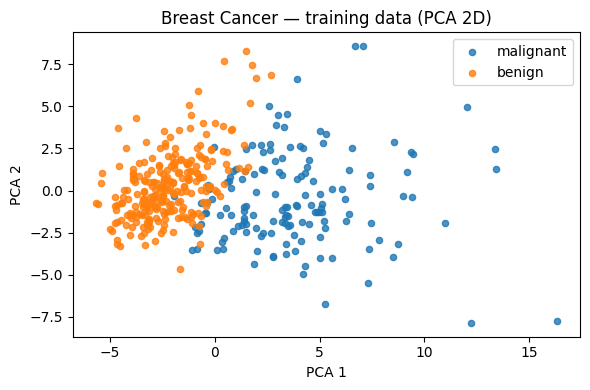

In [24]:
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_train_s)

plt.figure(figsize=(6,4))
for cls, name in enumerate(["malignant", "benign"]):
    sel = y_train == cls
    plt.scatter(X_pca[sel, 0], X_pca[sel, 1], s=20, alpha=0.8, label=name)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Breast Cancer — training data (PCA 2D)")
plt.legend()
plt.tight_layout()
plt.show()

### [Logistická regresia](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- trénujte na **škálovaných** dátach
- natrénujte, ohodnoťte
- sledujte ako zmena hyperparametrov mení výsledné hodnoty metrík

In [ ]:
# TODO
model = LogisticRegression(random_state=25, max_iter=20, C=1.0)
model.fit(X_train_s, y_train)

y_pred = model.predict(X_test_s)

accuracy = accuracy_score(y_test, y_pred)
print("Точность (accuracy):", accuracy)
print(classification_report(y_test, y_pred, target_names=data.target_names))

Точность (accuracy): 0.9766081871345029
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.97        64
      benign       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- trénujte na škálovaných dátach
- natrénujte s rôznymi kernelmi
- sledujte ako zmena hyperparametrov mení výsledné hodnoty metrík

Accuracy: 0.9064327485380117
              precision    recall  f1-score   support

   malignant       0.93      0.81      0.87        64
      benign       0.90      0.96      0.93       107

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.90       171



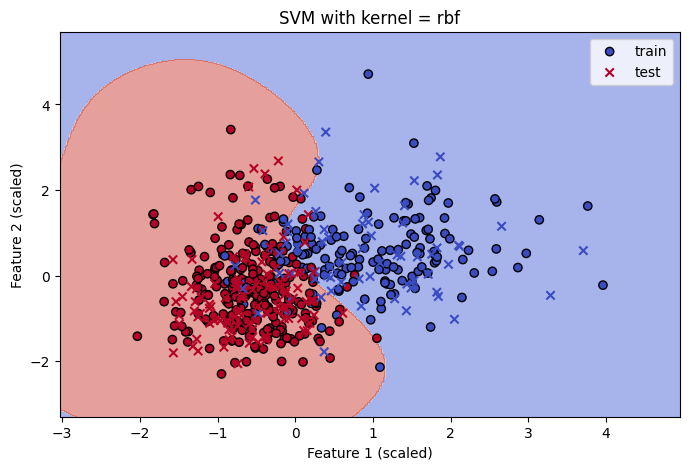

In [38]:
X_train_2d = X_train_s[:, :2]
X_test_2d = X_test_s[:, :2]

kernel = 'rbf' 

model = SVC(kernel=kernel, random_state=25)
model.fit(X_train_2d, y_train)

y_pred = model.predict(X_test_2d)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

h = .02
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,5))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='train')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', label='test')
plt.title(f"SVM with kernel = {kernel}")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()

### [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- bez škálovania
- natrénujte, ohodnoťte
- experiment: `max_depth`, `min_samples_leaf`
- sledujte **overfitting**
- sledujte ako zmena hyperparametrov mení výsledné hodnoty metrík

In [ ]:
# TODO
depths = [2, 4, 8]
min_samples = [1, 5, 10]

for d in depths:
    for m in min_samples:
        model = DecisionTreeClassifier(max_depth=d, min_samples_leaf=m, random_state=25)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"max_depth={d}, min_samples_leaf={m}, Accuracy={acc:.3f}")
        print(classification_report(y_test, y_pred, target_names=data.target_names))

max_depth=2, min_samples_leaf=1, Accuracy=0.942
              precision    recall  f1-score   support

   malignant       0.90      0.95      0.92        64
      benign       0.97      0.93      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

max_depth=2, min_samples_leaf=5, Accuracy=0.942
              precision    recall  f1-score   support

   malignant       0.90      0.95      0.92        64
      benign       0.97      0.93      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

max_depth=2, min_samples_leaf=10, Accuracy=0.942
              precision    recall  f1-score   support

   malignant       0.90      0.95      0.92        64
      benign       0.97      0.93      0.95       107

    accuracy                         

### [Random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
- bez škálovania
- natrénujte, ohodnoťte
- sledujte ako zmena hyperparametrov mení výsledné hodnoty metrík
- experiment: `n_estimators, max_depth, min_samples_leaf`
- skúste aj “zámerný overfit”: `max_depth=None, min_samples_leaf=1`

In [ ]:
# TODO
n_estimators_list = [10, 50]
max_depth_list = [3, 8, None]
min_samples_leaf_list = [1, 4]

results = []

for n in n_estimators_list:
    for d in max_depth_list:
        for m in min_samples_leaf_list:
            model = RandomForestClassifier(
                n_estimators=n, max_depth=d, min_samples_leaf=m, random_state=25
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append({
                "n_estimators": n,
                "max_depth": d,
                "min_samples_leaf": m,
                "accuracy": acc
            })

            print(f"n_estimators={n}, max_depth={d}, min_samples_leaf={m}, accuracy={acc:.3f}")

n_estimators=10, max_depth=3, min_samples_leaf=1, accuracy=0.971
n_estimators=10, max_depth=3, min_samples_leaf=4, accuracy=0.977
n_estimators=10, max_depth=8, min_samples_leaf=1, accuracy=0.959
n_estimators=10, max_depth=8, min_samples_leaf=4, accuracy=0.953
n_estimators=10, max_depth=None, min_samples_leaf=1, accuracy=0.959
n_estimators=10, max_depth=None, min_samples_leaf=4, accuracy=0.953
n_estimators=50, max_depth=3, min_samples_leaf=1, accuracy=0.959
n_estimators=50, max_depth=3, min_samples_leaf=4, accuracy=0.953
n_estimators=50, max_depth=8, min_samples_leaf=1, accuracy=0.959
n_estimators=50, max_depth=8, min_samples_leaf=4, accuracy=0.959
n_estimators=50, max_depth=None, min_samples_leaf=1, accuracy=0.959
n_estimators=50, max_depth=None, min_samples_leaf=4, accuracy=0.959


### Urobte tabuľku výsledných metrík

In [39]:
n_estimators_list = [10, 50]
max_depth_list = [3, 8, None]
min_samples_leaf_list = [1, 4]

print("n_estimators | max_depth | min_samples_leaf | accuracy")
print("-" * 50)

results = []

for n in n_estimators_list:
    for d in max_depth_list:
        for m in min_samples_leaf_list:
            model = RandomForestClassifier(
                n_estimators=n, max_depth=d, min_samples_leaf=m, random_state=25
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append((n, d, m, acc))
            print(f"{n:^12} | {str(d):^9} | {m:^15} | {acc:.3f}")

n_estimators | max_depth | min_samples_leaf | accuracy
--------------------------------------------------
     10      |     3     |        1        | 0.971
     10      |     3     |        4        | 0.977
     10      |     8     |        1        | 0.959
     10      |     8     |        4        | 0.953
     10      |   None    |        1        | 0.959
     10      |   None    |        4        | 0.953
     50      |     3     |        1        | 0.959
     50      |     3     |        4        | 0.953
     50      |     8     |        1        | 0.959
     50      |     8     |        4        | 0.959
     50      |   None    |        1        | 0.959
     50      |   None    |        4        | 0.959


# 2. Úlohy dnešného cvičenia pre učenie bez učiteľa

## 2.1 Importy

- numpy as np, matplotlib.pyplot as plt
- datasety: load_iris, make_moons
- škálovanie & projekcie: StandardScaler, PCA, (voliteľne) TSNE
- algoritmy: KMeans, AgglomerativeClustering, DBSCAN
- metriky (interné): silhouette_score, davies_bouldin_score

In [41]:
# TODO

from sklearn.datasets import load_iris, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score

# 2.2 IRIS dataset

 ## K-means

- Elbow graf (inertia vs `k`)
- vyber `k` a vyhodnoť **Silhouette/DB/CH**
- vizualizuj klastre na PCA(2D)

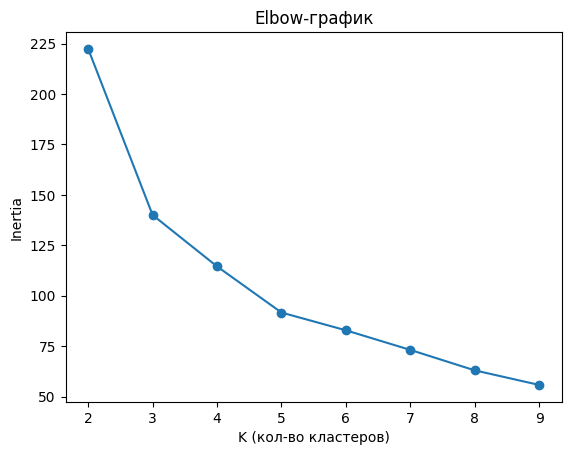

Оценка качества кластеров по разным метрикам:
k=2: silhouette=0.582, davies_bouldin=0.593
k=3: silhouette=0.463, davies_bouldin=0.832
k=4: silhouette=0.415, davies_bouldin=0.922


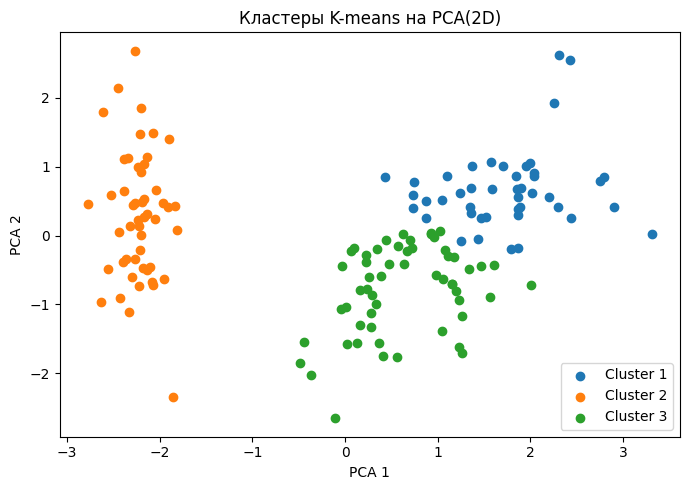

In [ ]:
# TODO
iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=25)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(K_range, inertia, marker="o")
plt.xlabel("K (кол-во кластеров)")
plt.ylabel("Inertia")
plt.title("Elbow-график")
plt.show()

# 3. Оценка качества кластеров
print("Оценка качества кластеров по разным метрикам:")
for k in [2, 3, 4]:
    km = KMeans(n_clusters=k, random_state=25)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"k={k}: silhouette={sil:.3f}, davies_bouldin={db:.3f}")

# 4. Визуализация кластеров на PCA(2D)
pca = PCA(n_components=2, random_state=25)
X_pca = pca.fit_transform(X_scaled)
k = 3  # например, выбрано по elbow или метрикам
km = KMeans(n_clusters=k, random_state=25)
clusters = km.fit_predict(X_scaled)
plt.figure(figsize=(7,5))
for cls in range(k):
    plt.scatter(X_pca[clusters == cls, 0], X_pca[clusters == cls, 1], label=f"Cluster {cls+1}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Кластеры K-means на PCA(2D)")
plt.legend()
plt.tight_layout()
plt.show()

## Aglomeratívne zhlukovanie

- rôzne `linkage` (`ward`, `complete`, `average`, `single`)
- vizualizácia + metriky

In [35]:
# TODO

# DBSCAN

- experimentuj s `eps`, `min_samples`; očakávame zvládnutie zakrivených klastrov
- nezabudni, že **-1** = šum
- metriky

# 2.3 Moon dataset

 ## K-means

- Elbow graf (inertia vs `k`)
- vyber `k` a vyhodnoť **Silhouette/DB/CH**
- vizualizuj klastre na PCA(2D)

In [36]:
# TODO

# DBSCAN

- experimentuj s `eps`, `min_samples`; očakávame zvládnutie zakrivených klastrov,
- nezabudni, že **-1** = šum
- metriky

In [37]:
# TODO